In [2]:
pip install pandas numpy matplotlib seaborn

  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl (11.0 MB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.8 MB 4.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/12.8 MB 4.4 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/12.8 MB 4.4 MB/s eta 0:00:03
   --------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: c:\Users\dell\Desktop\Items\MSID\S2\DI\Analyse-et-Classification-de-Donnees-Clients\.venv\Scripts\python.exe -m pip install --upgrade pip


In [3]:
# fait par : yasmine el mkhantar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("marketing_campaign.csv", sep="\t")  
print(df.head())
print(df.info())
df.describe

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

<bound method NDFrame.describe of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012  

In [4]:
#1.3 Nettoyage des données en Python
df['Education'] = df ['Education'].map({'2n cycle':0,'Master':1, 'Graduation':2,'PhD':3})

df.drop(columns=['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue',
                 'Response'], inplace=True)

df.drop_duplicates(inplace=True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer
0,5524,1957,2.0,Single,58138.0,0,0,04-09-2012
1,2174,1954,2.0,Single,46344.0,1,1,08-03-2014
2,4141,1965,2.0,Together,71613.0,0,0,21-08-2013
3,6182,1984,2.0,Together,26646.0,1,0,10-02-2014
4,5324,1981,3.0,Married,58293.0,1,0,19-01-2014


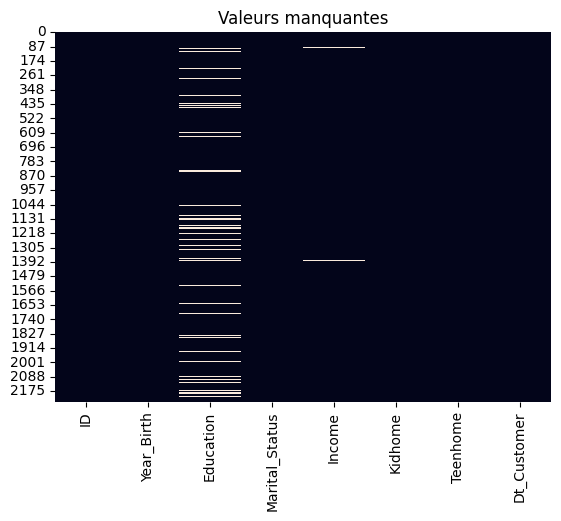

In [5]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Valeurs manquantes")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

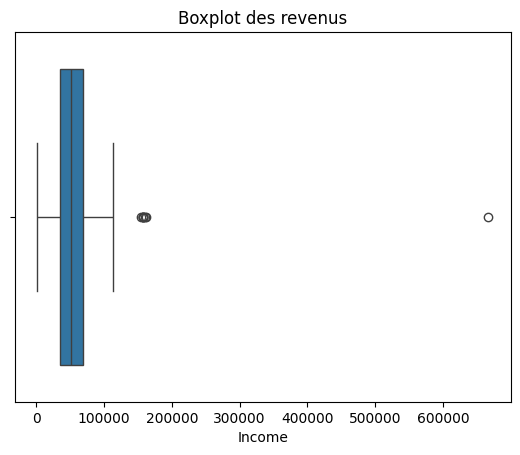

In [6]:
sns.boxplot(x=df['Income'])
plt.title("Boxplot des revenus")
plt.show

C:\Users\dell\AppData\Local\Temp\ipykernel_23764\3178519033.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Income"].fillna(df["Income"].median(), inplace=True)


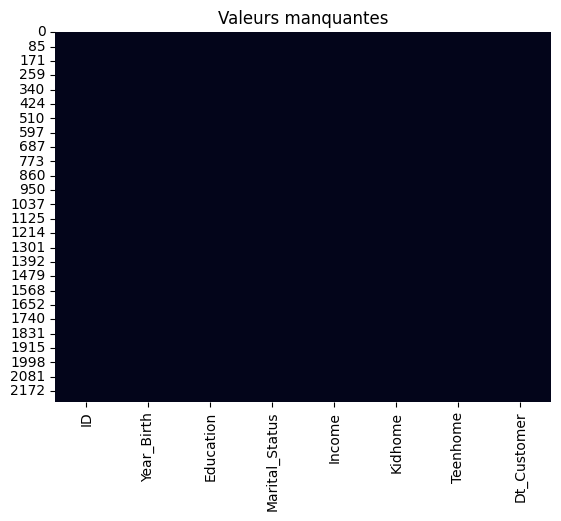

In [7]:
df["Income"].fillna(df["Income"].median(), inplace=True)
df = df[df["Education"].notnull()]
sns.heatmap(df.isnull(), cbar=False)
plt.title("Valeurs manquantes")
plt.show()

In [8]:
from datetime import datetime

current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']
df.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_23764\3360408678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = current_year - df['Year_Birth']


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Age
0,5524,1957,2.0,Single,58138.0,0,0,04-09-2012,68
1,2174,1954,2.0,Single,46344.0,1,1,08-03-2014,71
2,4141,1965,2.0,Together,71613.0,0,0,21-08-2013,60
3,6182,1984,2.0,Together,26646.0,1,0,10-02-2014,41
4,5324,1981,3.0,Married,58293.0,1,0,19-01-2014,44


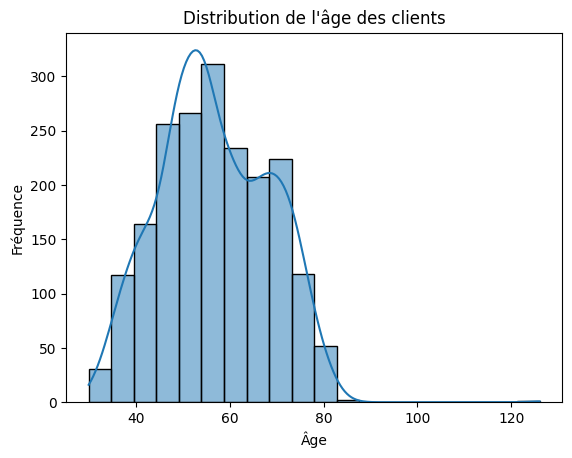

In [9]:
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Distribution de l'âge des clients")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

In [10]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Income'] < Q1 - 1.5 * IQR) | (df['Income'] > Q3 + 1.5 * IQR)]

print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
print("Nombre d'outliers détectés :", outliers.shape[0])

Q1 = 37106.5, Q3 = 69109.0, IQR = 32002.5
Nombre d'outliers détectés : 8


C:\Users\dell\AppData\Local\Temp\ipykernel_23764\1223521655.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anomaly'] = model.fit_predict(df[['Income', 'Age']])


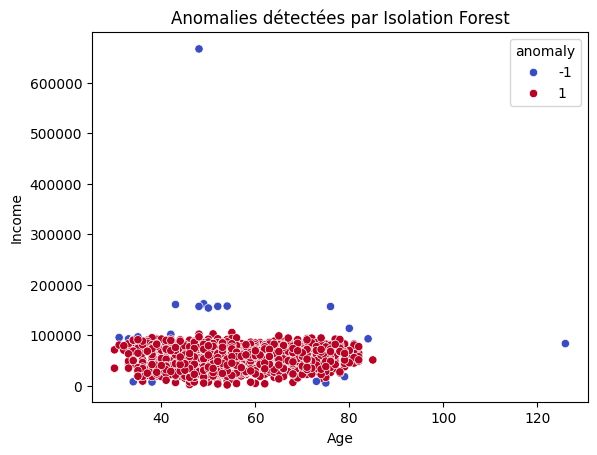

In [13]:
from sklearn.ensemble import IsolationForest

# k doit être choisi en fonction de la proportion attendue d'anomalies, par exemple 0.01 ou 0.05
# Pour cet exemple, nous allons utiliser 0.01 (1%)
k = 0.01
model = IsolationForest(contamination=k, random_state=42)
df['anomaly'] = model.fit_predict(df[['Income', 'Age']])

sns.scatterplot(data=df, x='Age', y='Income', hue='anomaly', palette='coolwarm')
plt.title("Anomalies détectées par Isolation Forest")
plt.show()

In [15]:
mean_before = df['Income'].mean()
mean_after = df[df['anomaly']==1] ['Income'].mean()
print("moyenne avant suppression des anomalies :", mean_before)
print("moyenne apres suppression des anomalies :", mean_after)

moyenne avant suppression des anomalies : 53573.24483106405
moyenne apres suppression des anomalies : 52846.316097809475


In [16]:
df_clean = df[df['anomaly'] == 1].copy()
df_clean.drop(columns = 'anomaly', inplace = True)

Q1 = df_clean['Income'].quantile(0.25)
Q3 = df_clean['Income'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_clean[(df_clean['Income'] < Q1 - 1.5 * IQR) | (df_clean['Income'] > Q3 + 1.5 * IQR)]

print("Nombre d'outliers détectés :", outliers.shape[0])

Nombre d'outliers détectés : 0


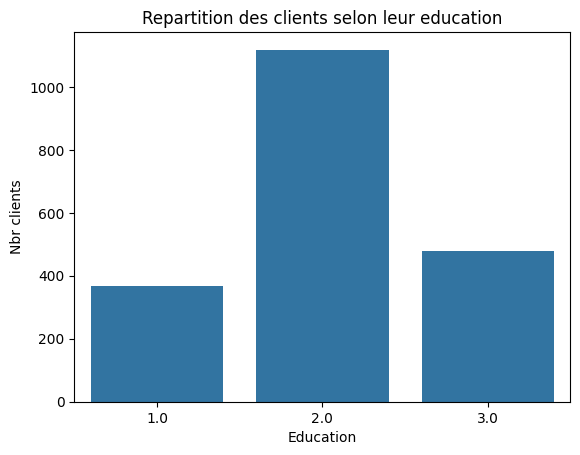

In [17]:
#Partie 3 : Analyse de données
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.countplot(x = 'Education', data = df_clean)
plt.title('Repartition des clients selon leur education')
plt.xlabel('Education')
plt.ylabel('Nbr clients')
plt.show()

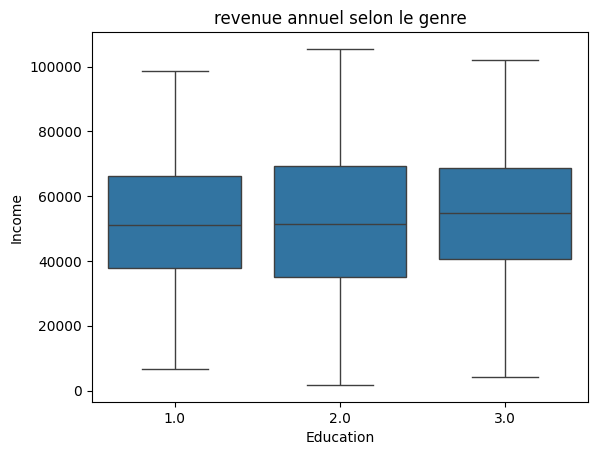

In [18]:
sns.boxplot(x='Education',y='Income',data=df_clean)
plt.title('revenue annuel selon le genre')
plt.show()